In [95]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from collections import Counter

from copy import deepcopy

from sklearn.utils import shuffle

%matplotlib inline

In [2]:
from importlib import reload

In [3]:
sub = pd.read_csv('McK_SubmissionFormat.csv')

In [4]:
sub.head()

offer_gk  driver_response
0    152446              NaN
1    281031              NaN
2    779964              NaN
3     16720              NaN
4    492087              NaN

In [5]:
test = pd.read_csv('CAX_TestData_McK.csv')
train = pd.read_csv('CAX_TrainingData_McK.csv')

In [6]:
inter = set(train['order_gk']) & (set(test['order_gk']))

In [7]:
interoffers_train = [x for x in train['order_gk'] if x in inter]
interoffers_test = [x for x in test['order_gk'] if x in inter]

In [72]:
len(set(X_train['offer_gk']) & set(X_test['offer_gk'])), len(set(X_train['offer_gk'])), len(set(X_test['offer_gk']))

(0, 892557, 237813)

In [73]:
len(set(X_train['driver_gk']) & set(X_test['driver_gk'])), len(set(X_train['driver_gk'])), len(set(X_test['driver_gk']))

(6237, 6823, 6237)

In [8]:
len(interoffers_train), len(interoffers_test), len(inter)

(10, 11, 7)

In [9]:
len(test['order_gk'])

237813

In [10]:
train.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       -1.000        -1.000           Economy        private                0  
1       18.802        25.217          Standard        private                1  
2        6.747         9.800           Economy        private                0  
3       -1.000        -1.000           Economy        private                1  
4       12.383        19.250           Economy        private                1

In [11]:
len(train[train['distance_km'] == -1])/ train.shape[0]

0.2848624793710654

In [12]:
len(train[train['driver_response'] == 1]) / train.shape[0],  train.shape[0]

(0.7402305959171235, 892557)

In [79]:
train.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       -1.000        -1.000           Economy        private                0  
1       18.802        25.217          Standard        private                1  
2        6.747         9.800           Economy        private                0  
3       -1.000        -1.000           Economy        private                1  
4       12.383        19.250           Economy        private                1

In [80]:
test.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0    152446            5         0       5021    648419        55.763302   
1    281031            5         7       5817    405907        55.755470   
2    779964            5         1       3870    894998        55.619002   
3     16720            5        13       5607    505054        55.620905   
4    492087            5        13       3786    459994        55.893228   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.593368              55.758230               37.613689   
1         37.648689              55.741544               37.622868   
2         37.596140              55.615923               37.607872   
3         37.606550              55.614517               37.591161   
4         37.673552              55.888084               37.662087   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       17.445        24.367           Premium        private              NaN  
1       -1.000        -1.000           Economy        private              NaN  
2       -1.000        -1.000          Standard       business              NaN  
3       -1.000        -1.000          Standard        private              NaN  
4       -1.000        -1.000          Standard        private              NaN

In [101]:
print(Counter(train['duration_min'])[-1]/train.shape[0],
      Counter(test['duration_min'])[-1]/test.shape[0])

0.2848624793710654 0.4065252950847935


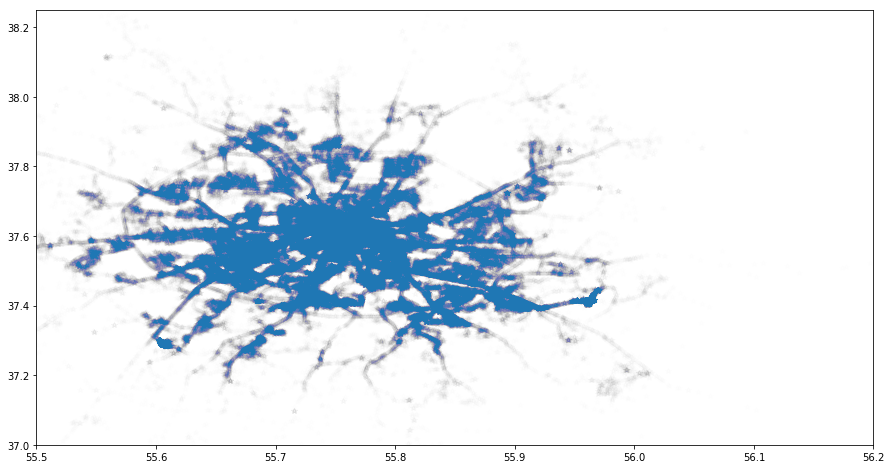

In [13]:
good_inds = [i for i in np.arange(train.shape[0]) if y_train[i] == 1]
bad_inds = [i for i in np.arange(train.shape[0]) if y_train[i] == 0]

plt.figure(figsize=(15,8))

plt.plot(train.iloc[good_inds]['driver_latitude'], train['driver_longitude'], 'r*',alpha=0.002)
plt.plot(train['driver_latitude'], train['driver_longitude'], 'r*',alpha=0.002)
plt.xlim([55.5,56.2])
plt.ylim([37,38.25])
plt.show()

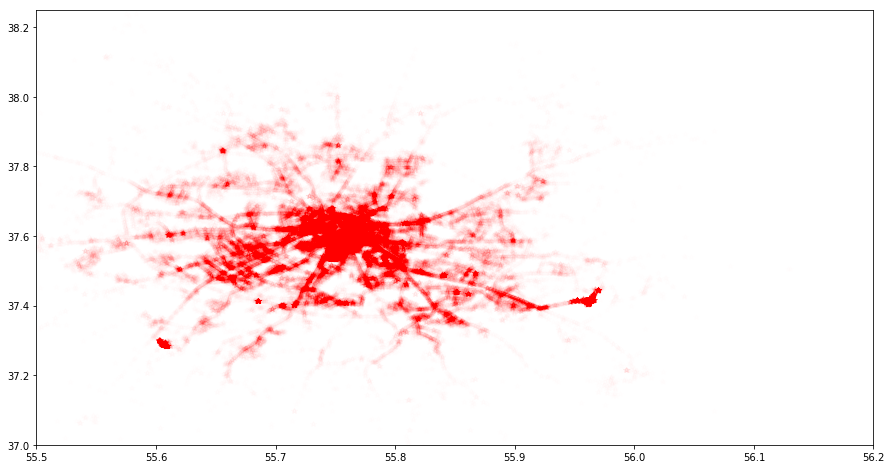

In [78]:
plt.figure(figsize=(15,8))
plt.plot(test['driver_latitude'], test['driver_longitude'], '*',alpha=0.002)
plt.xlim([55.5,56.2])
plt.ylim([37,38.25])
plt.show()

In [14]:
data = pd.concat([train, test], axis=0, ignore_index=True)

In [15]:
np.array(test.index)

array([     0,      1,      2, ..., 237810, 237811, 237812])

In [16]:
data.shape, train.shape, test.shape

((1130370, 14), (892557, 14), (237813, 14))

In [17]:
len(set(data.index)) == data.shape[0]

True

In [18]:
grouped = data.groupby(['weekday_key', 'hour_key']).count()['offer_gk']

In [19]:
pd.DataFrame(grouped).head()

offer_gk
weekday_key hour_key          
0           0             9951
            1             7501
            2             5626
            3             4478
            4             3789

In [20]:
# for i, ind in enumerate(grouped.index):
#     print(i, grouped[ind])

In [21]:
np.min([grouped[ind] for i, ind in enumerate(grouped.index)])

901

In [22]:
grouped_all = data.groupby(['weekday_key', 'hour_key'])

In [196]:
def add_my_features(df):
    center = [55.75370903771494, 37.61981338262558]
    df['driver_dist_to_centr'] = ((df['driver_latitude'] - center[0]) ** 2 + \
        (df['driver_longitude'] - center[1]) ** 2) ** 0.5
    df['origin_dist_to_centr'] = ((df['origin_order_latitude'] - center[0]) ** 2 + \
        (df['origin_order_longitude'] - center[1]) ** 2) ** 0.5
    df['dist_miss'] = (df['distance_km'] < 0)
    return df

In [24]:
train.shape

(892557, 14)

In [25]:
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       -1.000        -1.000           Economy        private              0.0  
1       18.802        25.217          Standard        private              1.0  
2        6.747         9.800           Economy        private              0.0  
3       -1.000        -1.000           Economy        private              1.0  
4       12.383        19.250           Economy        private              1.0

In [26]:
#     weekday_count = pd.DataFrame(df.groupby(['weekday_key']).size())
#     weekday_count.columns = ['weekday_overall_offers']
#     weekday_count['weekday_key'] = weekday_count.index
#     hour_count = pd.DataFrame(df.groupby(['hour_key']).size())
#     hour_count.columns = ['hour_overall_offers']
#     hour_count['hour_key'] = hour_count.index
#     weekday_hour_count = pd.DataFrame(df.groupby(['weekday_key', 'hour_key']).size())
#     weekday_hour_count.columns = ['weekday_hour_overall_offers']

In [197]:
def add_count_per_day_factors(df):
    weekday_count = pd.DataFrame(df.groupby(['weekday_key']).size())
    weekday_count.columns = ['weekday_overall_offers']
    weekday_count['weekday_key'] = weekday_count.index
    hour_count = pd.DataFrame(df.groupby(['hour_key']).size())
    hour_count.columns = ['hour_overall_offers']
    hour_count['hour_key'] = hour_count.index
    weekday_hour_count = pd.DataFrame(df.groupby(['weekday_key', 'hour_key']).size())
    weekday_hour_count.columns = ['weekday_hour_overall_offers']
    
    df = df.join(weekday_count, on='weekday_key', lsuffix='', rsuffix='_2').drop(['weekday_key_2'], axis=1)
    df = df.join(hour_count, on='hour_key', lsuffix='', rsuffix='_2').drop(['hour_key_2'], axis=1)
    df = df.join(weekday_hour_count, on=['weekday_key', 'hour_key'], lsuffix='', rsuffix='_2')
    return df

def add_overall_offers_factors(train, test, subdf):
    weekday_count = pd.DataFrame(train.groupby(['weekday_key']).size())
    weekday_count.columns = ['weekday_overall_offers']
    weekday_count['weekday_key'] = weekday_count.index
    hour_count = pd.DataFrame(train.groupby(['hour_key']).size())
    hour_count.columns = ['hour_overall_offers']
    hour_count['hour_key'] = hour_count.index
    weekday_hour_count = pd.DataFrame(train.groupby(['weekday_key', 'hour_key']).size())
    weekday_hour_count.columns = ['weekday_hour_overall_offers']

    weekday_count = subdf.groupby(['weekday_key'])['weekday_key'].agg({'weekday_key_orders' : 'size'}).reset_index()
    hour_count = subdf.groupby(['hour_key'])['hour_key'].agg({'hour_key_orders' : 'size'}).reset_index()
    weekday_hour_count = subdf.groupby(['weekday_key', 'hour_key'])[['hour_key', 'weekday_key']].agg({'weekday_hour_key_orders' : 'size'}).reset_index()
    train = train.merge(weekday_count, on='weekday_key')
    train = train.merge(hour_count, on='hour_key')
    train = train.merge(weekday_hour_count, on=['weekday_key', 'hour_key'])
    test = test.merge(weekday_count, on='weekday_key')
    test = test.merge(hour_count, on='hour_key')
    test = test.merge(weekday_hour_count, on=['weekday_key', 'hour_key'])
    
def add_mean_std_factors(train, test):
    weekday_count = pd.DataFrame(train.groupby(['weekday_key']).size())
    weekday_count.columns = ['weekday_overall_offers']
    weekday_count['weekday_key'] = weekday_count.index
    hour_count = pd.DataFrame(train.groupby(['hour_key']).size())
    hour_count.columns = ['hour_overall_offers']
    hour_count['hour_key'] = hour_count.index
    weekday_hour_count = pd.DataFrame(train.groupby(['weekday_key', 'hour_key']).size())
    weekday_hour_count.columns = ['weekday_hour_overall_offers']


    
    for sl in [['driver_gk'], ['driver_gk', 'weekday_key'], ['driver_gk', 'hour_key']]:
        for column in ["hour_key", "driver_latitude", "driver_longitude", "origin_order_latitude", "origin_order_longitude", "distance_km"]:
            current_mean = train.groupby(sl)[column].agg({column + "_" + ' '.join(sl) + "_mean": "mean", column + "_" + ' '.join(sl) +"_std": "std"}).reset_index()
            train = train.merge(current_mean, on=sl)
            test = test.merge(current_mean, how="left", on=sl)
            
def full_expander(train, test, df):
    add_overall_offers_factors(train ,test, df)
    add_mean_std_factors(train, test)
    train = add_my_features(add_count_per_day_factors(train))
    test = add_my_features(add_count_per_day_factors(test))
    return train, test

In [198]:
y_train = train['driver_response']
X_train = train.drop(['driver_response'],axis=1)
X_test = test.drop(['driver_response'],axis=1)
X_all = data.drop(['driver_response'],axis=1)

In [32]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

In [35]:
from joblib import Parallel, delayed
from sklearn.model_selection import GroupKFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

from catboost import Pool

In [225]:
def find_cats(df, cats):
    inds = []
    for i, col in enumerate(df.columns):
        if col in cats:
            inds.append(i)
    return inds
      
def custom_cross_val_score(X, y, groups, estimator, expander, cats, cv=4, test=None):
    X = deepcopy(X)
    y = deepcopy(y)
    np.random.seed(42)
    X['target'] = y
    X = X.sample(frac=1)
    X.index = np.arange(X.shape[0])
    y = X['target']
    X = X.drop(['target'],axis=1)
    res = []
    
    for inds_train, inds_test in GroupKFold(n_splits=cv).split(X, y, X[groups]):
        X_train, X_test = X.iloc[inds_train], X.iloc[inds_test]
        y_train, y_test = y[inds_train], y[inds_test]
        ins = set(X_train['order_gk']) & set(X_test['order_gk'])
        assert len(ins) == 0
        X_train, X_test = expander(X_train, X_test,  
                 X_train[['weekday_key', 'hour_key', 'order_gk']].drop_duplicates())
        cats_inds = find_cats(X_train, cats)
        train_pool = Pool(X_train, label=y_train, cat_features=cats_inds)
        test_pool = Pool(X_test, cat_features=cats_inds)
        test_pool_full = Pool(X_test, cat_features=cats_inds, label=y_test)
        estimator.fit(train_pool, plot=True)
        res.append(roc_auc_score(y_true=y_test, y_score=estimator.predict_proba(test_pool)[:, 1]))
        print(res[-1])
        
    return res

In [226]:
cats = ['weekday_key', 'hour_key', 
                              'driver_gk', 
                              'offer_class_group',
        'ride_type_desc', 'order_gk', 'offer_gk', 'dist_miss',
       ]

In [217]:
orders_missed = set(np.array(train[train['distance_km'] < 0]['order_gk']))
print(len(orders_missed))
locs = [i for i, order in enumerate(train['order_gk']) if order in orders_missed]
print(len(locs))
# train.iloc[locs].groupby(by='order_gk').mean()

209784
254256


In [219]:
orders_missed = set(np.array(test[test['distance_km'] < 0]['order_gk']))
print(len(orders_missed))
locs = [i for i, order in enumerate(test['order_gk']) if order in orders_missed]
print(len(locs))

82823
96677


In [220]:
X_train_bad = X_train[X_train['distance_km'] < 0]
y_train_bad = y_train[X_train_bad.index]
X_train_good = X_train[X_train['distance_km'] > 0]
y_train_good = y_train[X_train_good.index]

In [238]:
from sklearn.model_selection import GroupShuffleSplit

In [242]:
for tr,tt in GroupShuffleSplit(test_size=0.2).split(
    X_train, y_train, groups=X_train['order_gk']):
    X_train_val = X_train.iloc[tr]
    X_test_val = X_train.iloc[tt]
    y_train_val = y_train[tr]
    y_test_val = y_train[tt]
    break

In [244]:
X_train_full_exp, X_test_full_exp = full_expander(X_train, X_test,  
                 X_train[['weekday_key', 'hour_key', 'order_gk']].drop_duplicates())
X_train_val_exp, X_test_val_exp = full_expander(X_train_val, X_test_val,  
                        X_train_val[['weekday_key', 'hour_key', 'order_gk']].drop_duplicates())

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:26: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/Users/sergmiller/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:50: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


In [245]:
X_train_full_exp.shape, X_test_full_exp.shape, X_train_val_exp.shape, X_test_val_exp.shape

((892557, 19), (237813, 19), (714004, 19), (178553, 19))

In [247]:
y_train.shape, y_test_val.shape, y_train_val.shape

((892557,), (178553,), (714004,))

In [251]:
X_train_full_exp.to_csv('data/full/X_train.csv')
X_test_full_exp.to_csv('data/full/X_test.csv')
X_train_val_exp.to_csv('data/val/X_train.csv')
X_test_val_exp.to_csv('data/val/X_test.csv')
np.save('data/full/y_train', y_train)
np.save('data/val/y_train', y_train_val)
np.save('data/val/y_test', y_test_val)

In [236]:
%%time

res = custom_cross_val_score(X_train_good, y_train_good, 
                        expander=full_expander, 
                        groups=['order_gk'],
                        estimator=CatBoostClassifier(
                                random_seed=13, 
                                iterations=500,
                                rsm=0.4,
                                depth=7,
                                learning_rate=0.01,
                                thread_count=4,
                                eval_metric='AUC',
                                loss_function='Logloss',
                                one_hot_max_size=24,
                                l2_leaf_reg=100,
                                ctr_border_count=255,
                                bagging_temperature=35,
                                ),
                        cats=cats,    
                        cv=4,
                )

print(np.mean(res), np.std(res), res)

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:26: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/Users/sergmiller/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:50: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


A Jupyter Widget

0.822547218774


A Jupyter Widget

0.83341202583


A Jupyter Widget

0.828288180744


A Jupyter Widget

0.827430452876
0.827919469556 0.00385371048944 [0.8225472187740519, 0.83341202583045737, 0.82828818074386779, 0.82743045287580408]
CPU times: user 29min 33s, sys: 3min 10s, total: 32min 44s
Wall time: 15min 15s


In [237]:
%%time

res = custom_cross_val_score(X_train_bad, y_train_bad, 
                        expander=full_expander, 
                        groups=['order_gk'],
                        estimator=CatBoostClassifier(
                                random_seed=13, 
                                iterations=500,
                                rsm=0.4,
                                depth=7,
                                learning_rate=0.01,
                                thread_count=4,
                                eval_metric='AUC',
                                loss_function='Logloss',
                                one_hot_max_size=24,
                                l2_leaf_reg=100,
                                ctr_border_count=255,
                                bagging_temperature=35,
                                ),
                        cats=cats,    
                        cv=4,
                )

print(np.mean(res), np.std(res), res)

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:26: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
/Users/sergmiller/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:50: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


A Jupyter Widget

0.838043019769


A Jupyter Widget

0.835848822999


A Jupyter Widget

0.841344472192


A Jupyter Widget

0.838825895879
0.83851555271 0.00196429586927 [0.83804301976917772, 0.83584882299944974, 0.8413444721921105, 0.83882589587911194]
CPU times: user 12min 14s, sys: 1min 37s, total: 13min 52s
Wall time: 6min 33s


In [144]:
def fix_nans(X):
    mode = X.mode(axis=0).iloc[:1]
    for col in mode:
        try:
            mode[col] = np.array(mode[col], dtype=int)
        except:
            pass
    return X.fillna(mode)

def run_model(X_train, X_test, y_train, expander, model, cats):
        X_train = deepcopy(X_train)
        X_test = deepcopy(X_test)
        X_test = fix_nans(X_test)
#         expander(X_train, X_test,  
#                  X_train[['weekday_key', 'hour_key', 'order_gk']].drop_duplicates())
#         X_train.to_csv('train_expended')
#         X_test.to_csv('test_expended')
        cats_inds = find_cats(X_train, cats)
        train_pool = Pool(X_train, label=y_train, cat_features=cats_inds)
        model.fit(train_pool, plot=True)
        test_pool = Pool(X_test, cat_features=cats_inds)
        return model.predict_proba(test_pool)[:, 1]

In [148]:
for col in mode:
    try:
        mode[col] = np.array(mode[col], dtype=int)
    except:
        pass

In [145]:
X_train.shape, X_test.shape

((892557, 15), (237813, 15))

In [146]:
X_test.index = X_test.index + X_train.shape[0]

In [147]:
X_test_bad = X_test[X_test['distance_km'] < 0]
X_test_good = X_test[X_test['distance_km'] > 0]

In [210]:
%%time
pred_good = run_model(X_train_good, X_test_good, y_train_good, 
                        expander=full_expander, 
                        model=CatBoostClassifier(
                                random_seed=13, 
                                iterations=100,
                                rsm=0.3,
                                depth=7,
                                learning_rate=0.005,
                                thread_count=4,
                                eval_metric='AUC',
                                loss_function='Logloss',
                                ),
                        cats=cats)

pred_bad = run_model(X_train_bad, X_test_bad, y_train_bad, 
                        expander=full_expander, 
                        model=CatBoostClassifier(
                                random_seed=13, 
                                iterations=30,
                                rsm=0.1,
                                depth=7,
                                learning_rate=0.005,
                                thread_count=4,
                                eval_metric='AUC',
                                loss_function='Logloss',
                                ),
                        cats=cats)

KeyboardInterrupt: 

In [ ]:
len(X_test_good.index - X_train.shape[0]), len(pred_good)

In [158]:
sub['driver_response'].iloc[X_test_good.index - X_train.shape[0]] = pred_good
sub['driver_response'].iloc[X_test_bad.index - X_train.shape[0]] = pred_bad

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [160]:
# sub['driver_response'] = pred
sub.to_csv('submission_miller_cat_2_dist_groups.csv', index=False)

In [207]:
sub = sub.drop(['driver_responce'],axis=1)

In [212]:
sub

offer_gk  driver_response
0         152446         0.581160
1         281031         0.618801
2         779964         0.630936
3          16720         0.628830
4         492087         0.625312
5         856083         0.626981
6         646503         0.629427
7         188363         0.626421
8         208361         0.630039
9         950917         0.630023
10         11071         0.623291
11        666115         0.563060
12        447715         0.590978
13       1089270         0.628230
14         48939         0.629346
15       1028349         0.616260
16        551794         0.573016
17       1103935         0.616274
18       1004062         0.614687
19       1053786         0.603858
20        584706         0.614762
21        803826         0.630039
22        571133         0.602665
23        117096         0.630039
24        818572         0.630486
25        830633         0.624568
26       1106408         0.573039
27         24383         0.550422
28        329809         0.610450
29       1060735         0.612671
...          ...              ...
237783   1092176         0.628597
237784    391323         0.620129
237785     80110         0.632772
237786    767887         0.527592
237787    108022         0.529091
237788    701383         0.527592
237789    502817         0.527592
237790    821124         0.571882
237791   1111095         0.630230
237792    310715         0.620812
237793    879027         0.599990
237794    856403         0.620799
237795    779823         0.625820
237796    426027         0.630214
237797    676252         0.617656
237798    978998         0.630214
237799     78327         0.600695
237800    383234         0.629538
237801    205995         0.554508
237802     77067         0.615450
237803   1108344         0.625752
237804   1104551         0.620046
237805   1004239         0.573240
237806    605908         0.632788
237807    786828         0.606271
237808    791107         0.622667
237809     84388         0.620116
237810    221060         0.592347
237811     27573         0.629553
237812    150798         0.627570

[237813 rows x 2 columns]

In [214]:
sub['driver_response'].shape

(237813,)